# Data Science - Assignment 2

Dataset: <b>Heart Disease</b>

Thomas Bründl

se21m032

# Data Description

1. (age) : age in years    
2. (sex) : sex (1 = male; 0 = female)
3. (cp) : chest pain type <br>
            &emsp; &emsp; Value 1: typical angina <br>
            &emsp; &emsp; Value 2: atypical angina <br>
            &emsp; &emsp; Value 3: non-anginal pain <br>
            &emsp; &emsp; Value 4: asymptomatic <br> 
4. (trestbps) : resting blood pressure (in mm Hg on admission to the 
        hospital)
5. (chol) : serum cholestoral in mg/dl     
6. (fbs) : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)    
7. (restecg) : resting electrocardiographic results <br>
        &emsp; &emsp; Value 0: normal <br> 
        &emsp; &emsp; Value 1: having ST-T wave abnormality (T wave inversions and/or ST
                    elevation or depression of > 0.05 mV) <br>
        &emsp; &emsp; Value 2: showing probable or definite left ventricular hypertrophy 
                    by Estes' criteria <br>
8. (thalach) : maximum heart rate achieved
9. (exang) : exercise induced angina (1 = yes; 0 = no) 
10. (oldpeak) : ST depression induced by exercise relative to rest
11. (slope) : the slope of the peak exercise ST segment <br>
        &emsp; &emsp; Value 1: upsloping <br>
        &emsp; &emsp; Value 2: flat <br>
        &emsp; &emsp; Value 3: downsloping <br>
12. (ca) : number of major vessels (0-3) colored by flourosopy     
13. (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect   
14. (num) : diagnosis of heart disease (angiographic disease status) <br>
         &emsp; &emsp; Value 0: < 50% diameter narrowing <br>
         &emsp; &emsp; Value 1: > 50% diameter narrowing <br> &emsp; &emsp; (in any major vessel: attributes 59 through 68 are vessels) <br>

# Import necessary dependencies

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and concat raw data

In [16]:
columnNames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

raw_data_cleveland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',', names = columnNames)
raw_data_hungarian = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', sep=',', names = columnNames)
raw_data_switzerland = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', sep=',', names = columnNames)
raw_data_va = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data', sep=',', names = columnNames)

raw_data = pd.concat([raw_data_cleveland, raw_data_hungarian, raw_data_switzerland, raw_data_va])
raw_data = raw_data.sample(frac=1, random_state=42).reset_index(drop=True)

print('columns: ' + str(len(raw_data)))

columns: 920


# Show raw data

In [17]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

raw_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,36.0,1.0,2.0,120,166,0,0,180,0,0.0,?,?,?,0
1,45.0,1.0,2.0,140,224,1,0,122,0,0.0,?,?,?,0
2,48.0,1.0,4.0,160,329,0,0,92,1,1.5,2,?,?,1
3,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
4,40.0,0.0,4.0,150,392,0,0,130,0,2.0,2,?,6,1
5,65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0.0,3.0,0
6,34.0,1.0,1.0,140,156,0,0,180,0,0.0,?,?,?,1
7,57.0,1.0,4.0,160,0,?,0,98,1,2,2,?,7,2
8,49.0,1.0,1.0,130,0,0,1,145,0,3,2,?,?,2
9,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0


## Parsing data

In [18]:
data=raw_data

def parseToFloat(y):
    try:
        return float(y)
    except:
        return None

def processColumn(data, column):
    data[column] = data[column].apply(lambda value: parseToFloat(value))

for columnName in columnNames:
    processColumn(data=raw_data, column=columnName)

data['chol'] = data['chol'].apply(lambda value: None if value == 0 else value)
data['oldpeak'] = data['oldpeak'].apply(lambda value: None if value == 0 else value)

# Map description to number value

In [19]:
dataDict = {
  "age": {"catData": None},
  "sex": {"catData": {1: "Male", 0: "Female"}},
  "cp": {"catData": {1: "typical angina",2: "atypical angina", 3: "non-anginal pain", 4 : "asymptomatic" }},
  "trestbps" :  {"catData": None},
  "chol" :  {"catData": None},
  "fbs" :   {"catData": {1: "True", 0: "False"}},
  "restecg": {"catData": {0: "normal",1: "having ST-T wave abnormality", 2: "showing probable"}},
  "thalach": {"catData": None},
  "exang": {"catData": {1: "yes", 0: "no"}},
  "oldpeak": {"catData": None},
  "slope": {"catData": {1: "upsloping",2: "flat", 3: "downsloping"}},
  "ca": {"catData": None},
  "thal": {"catData": {3: "normal", 6: "fixed defect", 7: "reversable defect"}},
  "num": {"catData": {0: "< 50% diameter narrowing", 1: "> 50% diameter narrowing"}},
} 

newData = data.copy(deep=True)

def applyCatData(numData, colName):
    for key in dataDict[colName]["catData"]:
          if key == numData:
                return dataDict[colName]["catData"][key]
    return None


for colName in dataDict:
    if None != dataDict[colName]["catData"]:
        newData[colName] =  newData[colName].apply(lambda numData: applyCatData(numData, colName))


In [20]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
newData.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,36.0,Male,atypical angina,120.0,166.0,False,normal,180.0,no,NaN,None,NaN,None,< 50% diameter narrowing
1,45.0,Male,atypical angina,140.0,224.0,True,normal,122.0,no,NaN,None,NaN,None,< 50% diameter narrowing


# Dimensionality reduction

In [24]:
observedSampleSize = 30000;
x = raw_data.head(observedSampleSize)

b = x.apply(lambda b2: b2.apply(lambda value: float(value)))
b = b.dropna()
a = b.to_numpy()

print("sample size: " + str(len(a)))

sample size: 203


# Method 1: PCA

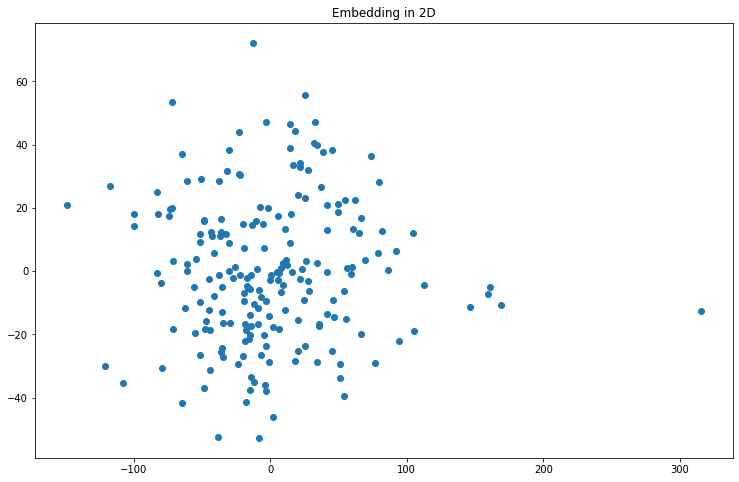

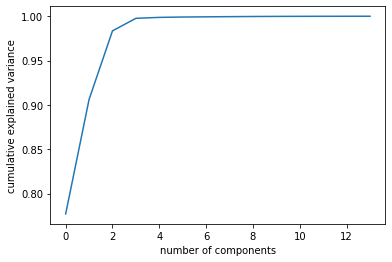

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(a)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
X_transform = principalDf.to_numpy()
finalDf = principalDf

fig = plt.figure(2, (30,8))

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1])
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

X = np.array(a)

pca = PCA(n_components=2)
pca = PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [26]:

varianceFirstComponent = round(pca.explained_variance_ratio_[0] * 100, 2)
varianceSecondComponent = round(pca.explained_variance_ratio_[1] * 100, 2)

print("The first component describes " + str(varianceFirstComponent) + "% of the variance.")
print("The second component describes " + str(varianceSecondComponent) + "% of the variance.")

print("The variance of the first and second component combined account for "   + str( round(varianceFirstComponent + varianceSecondComponent , 2) ) + "% of the total variance. ")


The first component describes 77.7% of the variance.
The second component describes 12.92% of the variance.
The variance of the first and second component combined account for 90.62% of the total variance. 


# Method 2: MDS

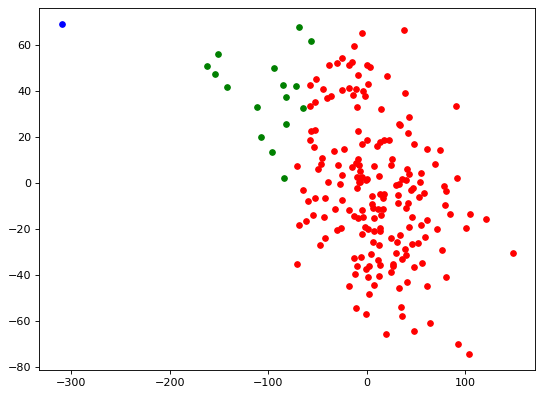

In [28]:
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from sklearn.cluster import estimate_bandwidth
from matplotlib.pyplot import figure
from sklearn.manifold import MDS

figure(figsize=(8, 6), dpi=80)

X = np.array(a)
mds = MDS(random_state=0)
X = mds.fit_transform(X)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

colors = 10 * ['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='' , s=150, linewidths=5, zorder=10),

plt.show()


# 3. Method: t-sne

C:\Users\tbrue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tbrue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 203 samples in 0.001s...
[t-SNE] Computed neighbors for 203 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 203 / 203
[t-SNE] Mean sigma: 20.622052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.508720
[t-SNE] KL divergence after 800 iterations: 0.387469


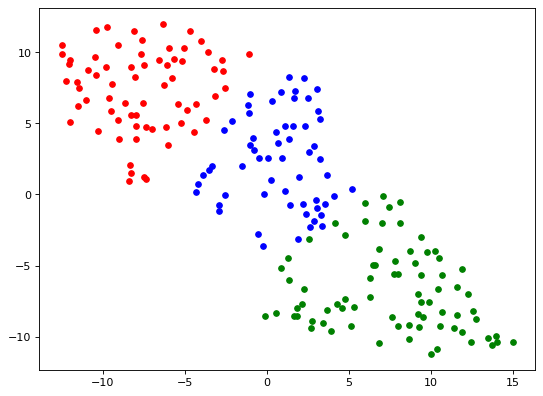

In [29]:
from sklearn.manifold import TSNE

figure(figsize=(8, 6), dpi=80)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
X = tsne.fit_transform(a)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

colors = 10 * ['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='' , s=150, linewidths=5, zorder=10),

plt.show()
